In [1]:
import torch.cuda

from re_utils.train import train_ner

In [2]:
num_labels = 17
train_tokenized_texts_path = "/home/chudeo/bert-crf-project/resources/data/train/medBERT/med-bert_labeled_texts.jsonl"
test_tokenized_texts_path = "/home/chudeo/bert-crf-project/resources/data/test/medBERT/med-bert_test_labeled_texts.jsonl"
dropout = 0.2
batch_size = 16
epochs = 15
log_every = 20
lr_new_layers = 1e-3
lr_bert = 1e-5
device = "cuda" if torch.cuda.is_available() else "cpu"

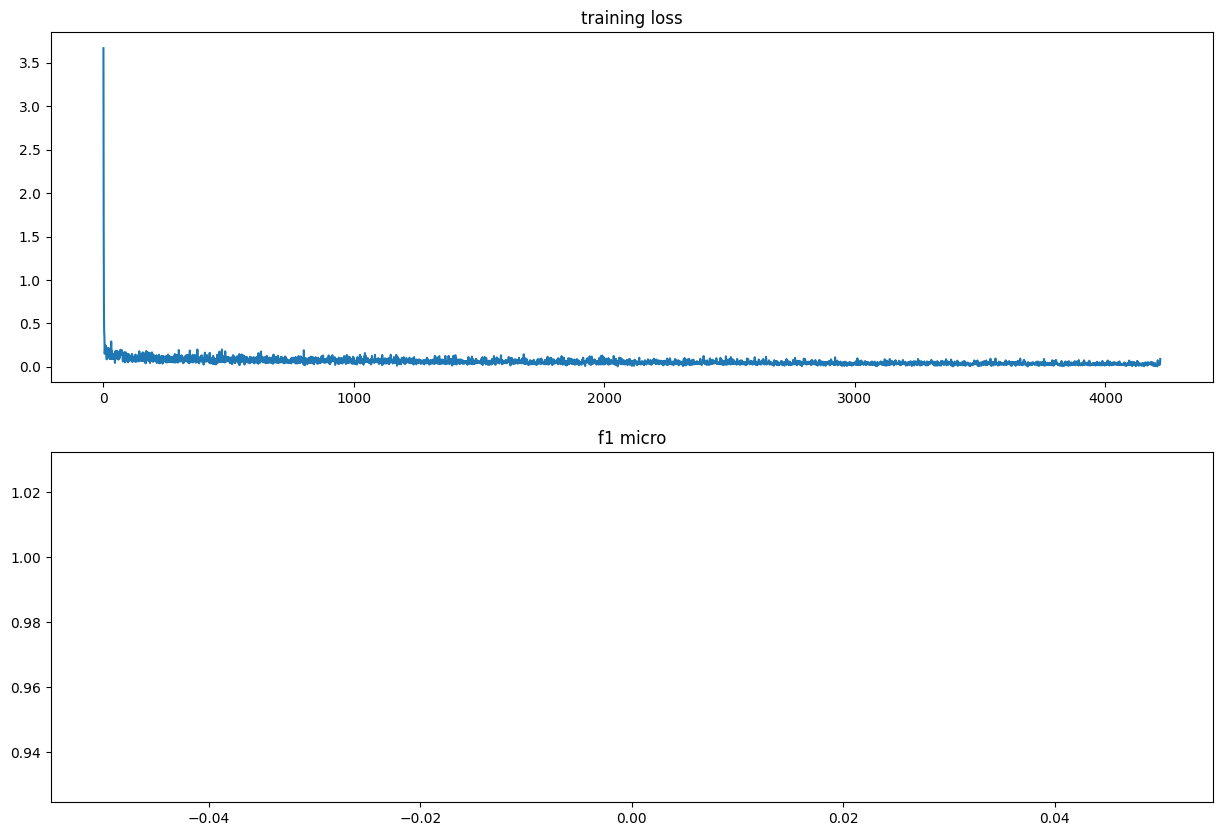

Current loss: 0.09150569885969162
Current f1: 0.9784554576421801
Epoch 10/15


100%|██████████| 422/422 [04:25<00:00,  1.59it/s]


In [3]:
# sberbank-ai/ruBert-base w/o crf

train_ner(
    num_labels=num_labels,
    bert_name="Tsubasaz/clinical-pubmed-bert-base-128",
    train_tokenized_texts_path=train_tokenized_texts_path,
    test_tokenized_texts_path=test_tokenized_texts_path,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    log_every=log_every,
    lr_new_layers=lr_new_layers,
    lr_bert=lr_bert,
    use_crf=False,
    save_to=None,
    device=device
)

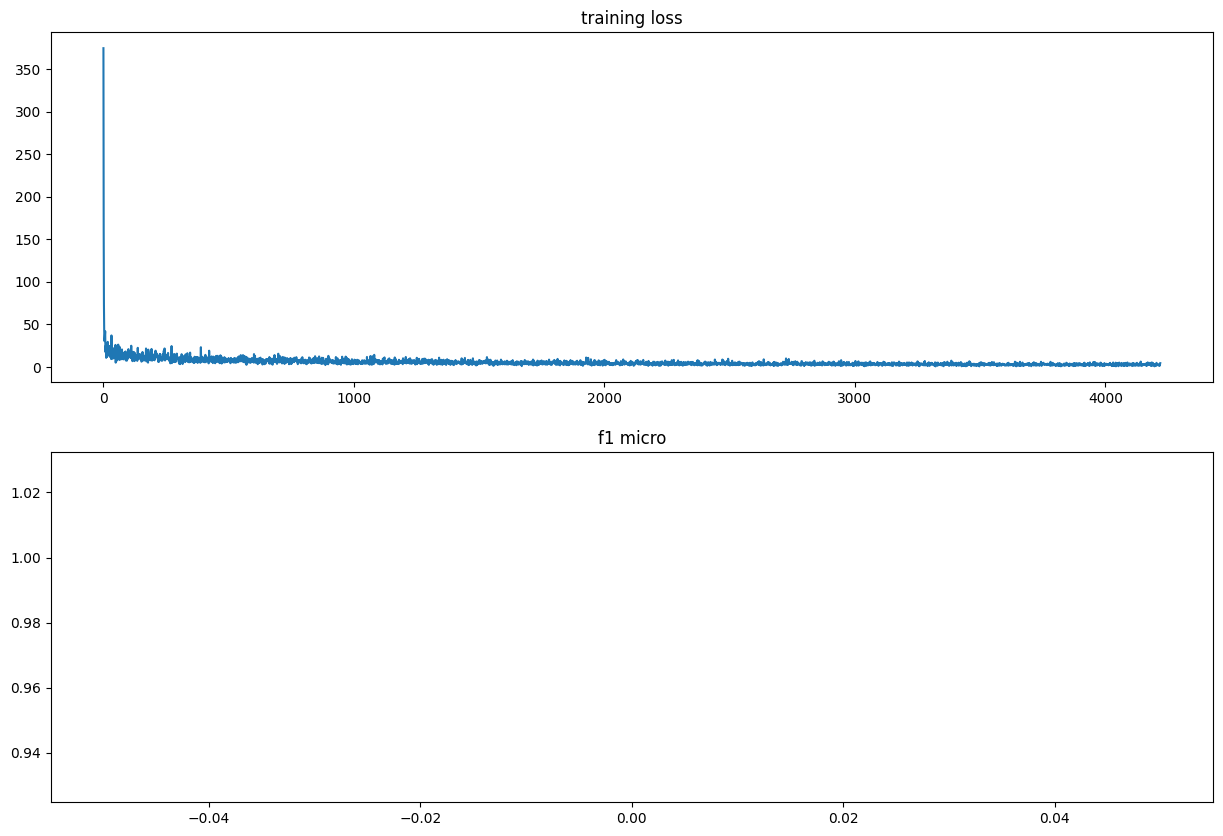

Current loss: 4.5319061279296875
Current f1: 0.9785480228080569
Epoch 10/15


100%|██████████| 422/422 [05:09<00:00,  1.36it/s]


In [4]:
# sberbank-ai/ruBert-base + crf

train_ner(
    num_labels=num_labels,
    bert_name="Tsubasaz/clinical-pubmed-bert-base-128",
    train_tokenized_texts_path=train_tokenized_texts_path,
    test_tokenized_texts_path=test_tokenized_texts_path,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    log_every=log_every,
    lr_new_layers=lr_new_layers,
    lr_bert=lr_bert,
    use_crf=True,
    save_to=None,
    device=device
)

In [5]:
# rurebus-bert w/o crf

train_ner(
    num_labels=num_labels,
    bert_name="weights/rurebus-bert",
    train_tokenized_texts_path=train_tokenized_texts_path,
    test_tokenized_texts_path=test_tokenized_texts_path,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    log_every=log_every,
    lr_new_layers=lr_new_layers,
    lr_bert=lr_bert,
    use_crf=False,
    save_to="weights/bert-crf.pt",
    device=device
)

OSError: weights/rurebus-bert is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo with `use_auth_token` or log in with `huggingface-cli login` and pass `use_auth_token=True`.

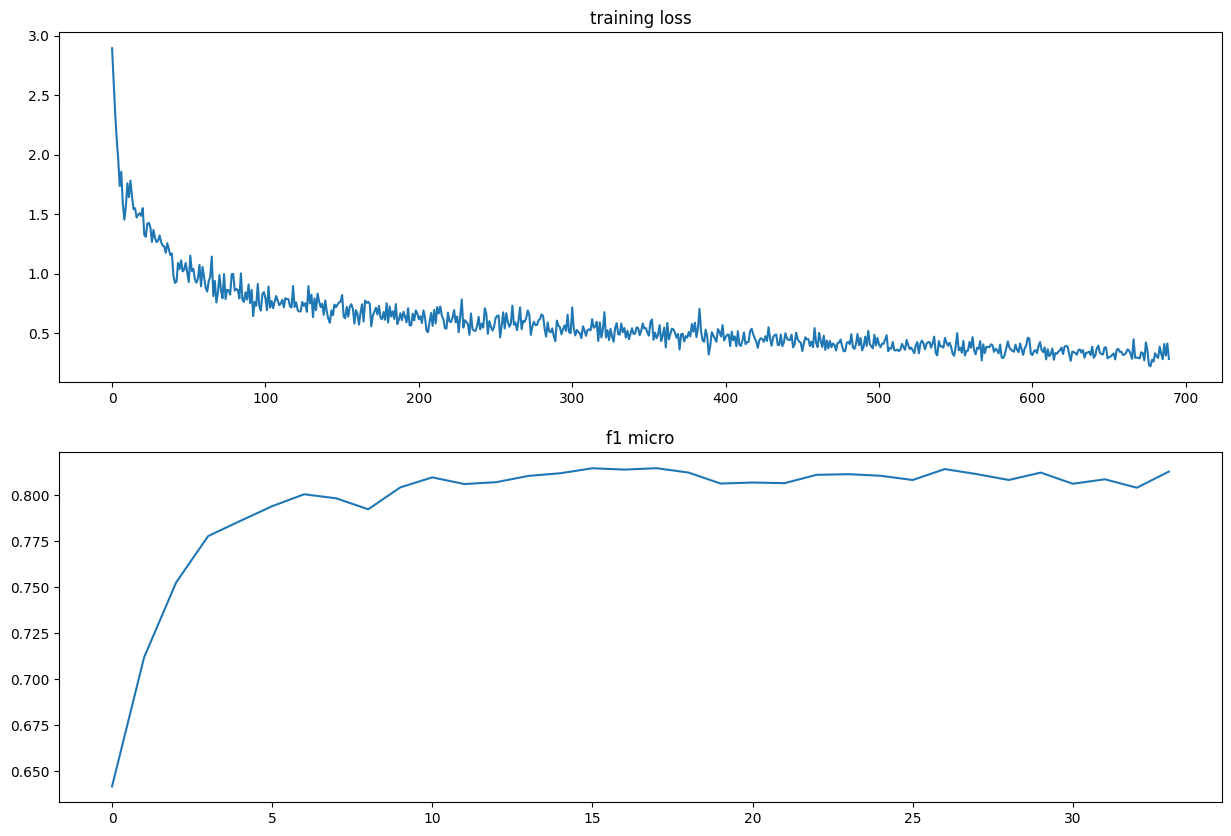

100%|███████████████████████████████████████████| 46/46 [00:20<00:00,  2.28it/s]

Current loss: 0.2831282615661621
Current f1: 0.8127809115863774
Epoch 15/15


In [ ]:
# rurebus-bert + crf

train_ner(
    num_labels=num_labels,
    bert_name="weights/rurebus-bert",
    train_tokenized_texts_path=train_tokenized_texts_path,
    test_tokenized_texts_path=test_tokenized_texts_path,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    log_every=log_every,
    lr_new_layers=lr_new_layers,
    lr_bert=lr_bert,
    use_crf=True,
    save_to="weights/bert-wo-crf.pt",
    device=device
)